# 3-sphere: vector fields and left-invariant parallelization

This worksheet demonstrates a few capabilities of
[SageManifolds](http://sagemanifolds.obspm.fr) (version 1.0, as included in SageMath 7.5)
on the example of the 3-dimensional sphere, $\mathbb{S}^3$.

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v1.0/SM_sphere_S3_vectors.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, via the command `sage -n jupyter`

*NB:* a version of SageMath at least equal to 7.5 is required to run this worksheet:

In [1]:
version()

'SageMath version 7.5.1, Release Date: 2017-01-15'

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [2]:
%display latex

We also define a viewer for 3D plots (use `'threejs'` or `'jmol'` for interactive 3D graphics):

In [3]:
viewer3D = 'threejs' # must be 'threejs', jmol', 'tachyon' or None (default)

## $\mathbb{S}^3$ as a 3-dimensional differentiable manifold

We start by declaring $\mathbb{S}^3$ as a differentiable manifold of dimension 3 over $\mathbb{R}$:

In [4]:
S3 = Manifold(3, 'S^3', latex_name=r'\mathbb{S}^3', start_index=1)

The first argument, `3`, is the dimension of the manifold, while the second argument is the symbol used to label the manifold, with the LaTeX output specified by the argument `latex_name`. The argument `start_index` sets the index range to be used on the manifold for labelling components w.r.t. a basis or a frame: `start_index=1` corresponds to $\{1,2,3\}$; the default value is `start_index=0`, yielding to $\{0,1,2\}$.

In [5]:
print(S3)

3-dimensional differentiable manifold S^3


In [6]:
S3

3-dimensional differentiable manifold S^3

### Coordinate charts on $\mathbb{S}^3$

The 3-sphere cannot be covered by a single chart. At least two charts are necessary, for instance the charts associated with the stereographic projections from two distinct points, $N$ and $S$ say,
which we may call the *North pole* and the *South pole* respectively. Let us introduce the open subsets covered by these two charts: 
$$ U := \mathbb{S}^3\setminus\{N\} $$  
$$ V := \mathbb{S}^3\setminus\{S\} $$

In [7]:
U = S3.open_subset('U') ; print(U)

Open subset U of the 3-dimensional differentiable manifold S^3


In [8]:
V = S3.open_subset('V') ; print(V)

Open subset V of the 3-dimensional differentiable manifold S^3


We declare that $\mathbb{S}^3 = U \cup V$:

In [9]:
S3.declare_union(U, V)

Then we introduce the stereographic chart on $U$, denoting by $(x,y,z)$ the coordinates resulting from the stereographic projection from the North pole onto the equatorial plane:

In [10]:
stereoN.<x,y,z> = U.chart()
stereoN

Chart (U, (x, y, z))

In [11]:
stereoN.coord_range()

x: (-oo, +oo); y: (-oo, +oo); z: (-oo, +oo)

Similarly, we introduce on $V$ the coordinates $(x',y',z')$ corresponding to the stereographic projection from the South pole onto the equatorial plane:

In [12]:
stereoS.<xp,yp,zp> = V.chart("xp:x' yp:y' zp:z'")
stereoS

Chart (V, (xp, yp, zp))

In [13]:
stereoS.coord_range()

xp: (-oo, +oo); yp: (-oo, +oo); zp: (-oo, +oo)

We have to specify the **transition map** between the charts `stereoN` = $(U,(x,y,z))$ and `stereoS` = $(V,(x',y',z'))$; it is given by the standard inversion formulas:

In [14]:
r2 = x^2+y^2+z^2
stereoN_to_S = stereoN.transition_map(stereoS, 
                                      (x/r2, y/r2, z/r2), 
                                      intersection_name='W',
                                      restrictions1= x^2+y^2+z^2!=0, 
                                      restrictions2= xp^2+yp^2+zp^2!=0)
stereoN_to_S.display()

xp = x/(x^2 + y^2 + z^2)
yp = y/(x^2 + y^2 + z^2)
zp = z/(x^2 + y^2 + z^2)

In the above declaration, `'W'` is the name given to the open subset where the two charts overlap: $W := U\cap V$, the condition $x^2+y^2+z^2\not=0$  defines $W$ as a subset of $U$, and the condition $x'^2+y'^2+z'^2\not=0$ defines $W$ as a subset of $V$.

The inverse coordinate transformation is computed by means of the method `inverse()`:

In [15]:
stereoS_to_N = stereoN_to_S.inverse()
stereoS_to_N.display()

x = xp/(xp^2 + yp^2 + zp^2)
y = yp/(xp^2 + yp^2 + zp^2)
z = zp/(xp^2 + yp^2 + zp^2)

Note that the situation is of course perfectly symmetric regarding the coordinates $(x,y,z)$ and $(x',y',z')$.

At this stage, the user's atlas has four charts:

In [16]:
S3.atlas()

[Chart (U, (x, y, z)),
 Chart (V, (xp, yp, zp)),
 Chart (W, (x, y, z)),
 Chart (W, (xp, yp, zp))]

For future reference, we store $W=U\cap V$ into a Python variable:

In [17]:
W = U.intersection(V)
print(W)

Open subset W of the 3-dimensional differentiable manifold S^3


### The North and South poles

$N$ is the point of $V$ of stereographic coordinates $(x',y',z')=(0,0,0)$:

In [18]:
N = V((0,0,0), chart=stereoS, name='N')
print(N)

Point N on the 3-dimensional differentiable manifold S^3


while $S$ is the point of U of stereographic coordinates $(x,y,z)=(0,0,0)$:

In [19]:
S = U((0,0,0), chart=stereoN, name='S')
print(S)

Point S on the 3-dimensional differentiable manifold S^3


We have of course

In [20]:
all([N not in U, N in V, S in U, S not in V])

True

## Embedding of $\mathbb{S}^3$ into $\mathbb{R}^4$

Let us first declare $\mathbb{R}^4$ as a 4-dimensional manifold covered by a single chart (the so-called **Cartesian coordinates**):

In [21]:
R4 = Manifold(4, 'R^4', r'\mathbb{R}^4')
X4.<T,X,Y,Z> = R4.chart()
X4

Chart (R^4, (T, X, Y, Z))

The embedding of $\mathbb{S}^3$ into $\mathbb{R}^4$ is then defined by the standard formulas relating the stereographic coordinates to the ambient Cartesian ones when considering a **stereographic projection** from the point $(-1,0,0,0)$ to the equatorial plane $T=0$:

In [22]:
rp2 = xp^2 + yp^2 + zp^2
Phi = S3.diff_map(R4, {(stereoN, X4): 
                       [(1-r2)/(r2+1), 2*x/(r2+1), 
                        2*y/(r2+1), 2*z/(r2+1)],
                       (stereoS, X4):
                       [(rp2-1)/(rp2+1), 2*xp/(rp2+1), 
                        2*yp/(rp2+1), 2*zp/(rp2+1)]},
                  name='Phi', latex_name=r'\Phi')
Phi.display()

Phi: S^3 --> R^4
on U: (x, y, z) |--> (T, X, Y, Z) = (-(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 + 1), 2*x/(x^2 + y^2 + z^2 + 1), 2*y/(x^2 + y^2 + z^2 + 1), 2*z/(x^2 + y^2 + z^2 + 1))
on V: (xp, yp, zp) |--> (T, X, Y, Z) = ((xp^2 + yp^2 + zp^2 - 1)/(xp^2 + yp^2 + zp^2 + 1), 2*xp/(xp^2 + yp^2 + zp^2 + 1), 2*yp/(xp^2 + yp^2 + zp^2 + 1), 2*zp/(xp^2 + yp^2 + zp^2 + 1))

### Projections of $\mathbb{R}^4$ to $\mathbb{S}^3$

In [23]:
R4N = R4.open_subset('R4N', latex_name=r'\mathbb{R}^4_N', 
                     coord_def={X4: T!=-1})
X4N = X4.restrict(R4N)

In [24]:
ProjN = R4N.diff_map(U, {(X4N, stereoN): 
                         [X/(1+T), Y/(1+T), Z/(1+T)]},
                     name='P_N', latex_name=r'\Pi_N')
ProjN.display()

P_N: R4N --> U
   (T, X, Y, Z) |--> (x, y, z) = (X/(T + 1), Y/(T + 1), Z/(T + 1))

In [25]:
R4S = R4.open_subset('R4S', latex_name=r'\mathbb{R}^4_S', 
                     coord_def={X4: T!=1})
X4S = X4.restrict(R4S)

In [26]:
ProjS = R4S.diff_map(V, {(X4S, stereoS): 
                         [X/(1-T), Y/(1-T), Z/(1-T)]},
                     name='P_S', latex_name=r'\Pi_S')
ProjS.display()

P_S: R4S --> V
   (T, X, Y, Z) |--> (xp, yp, zp) = (-X/(T - 1), -Y/(T - 1), -Z/(T - 1))

In [27]:
var('a b c', domain='real')
p = S3((1+a^2,b,c), chart=stereoN)
stereoN(p)

(a^2 + 1, b, c)

In [28]:
all([p in U, p in V])

True

In [29]:
all([ProjN(Phi(p)) == p, ProjS(Phi(p)) == p])

True

In [30]:
p = S3((1+a^2,b,c), chart=stereoS)
all([ProjN(Phi(p)) == p, ProjS(Phi(p)) == p])

True

In [31]:
q = R4((sqrt(3)/2, sin(a)*cos(b)/2, sin(a)*sin(b)/2, cos(a)/2))
X4(q)

(1/2*sqrt(3), 1/2*cos(b)*sin(a), 1/2*sin(a)*sin(b), 1/2*cos(a))

In [32]:
all([q in R4N, q in R4S])

True

In [33]:
all([Phi(ProjN(q)) == q, Phi(ProjS(q)) == q])

True

## Hyperspherical coordinates

In [34]:
A = W.open_subset('A', coord_def={stereoN.restrict(W): (y!=0, x<0), 
                                  stereoS.restrict(W): (yp!=0, xp<0)})
print(A)

Open subset A of the 3-dimensional differentiable manifold S^3


In [35]:
spher.<ch,th,ph> = A.chart(r'ch:(0,pi):\chi th:(0,pi):\theta ph:(0,2*pi):\phi')
spher

Chart (A, (ch, th, ph))

In [36]:
den = 1 + cos(ch)
spher_to_stereoN = spher.transition_map(stereoN.restrict(A), 
                                        (sin(ch)*sin(th)*cos(ph)/den,
                                         sin(ch)*sin(th)*sin(ph)/den,
                                         sin(ch)*cos(th)/den))
spher_to_stereoN.display()

x = cos(ph)*sin(ch)*sin(th)/(cos(ch) + 1)
y = sin(ch)*sin(ph)*sin(th)/(cos(ch) + 1)
z = cos(th)*sin(ch)/(cos(ch) + 1)

In [37]:
spher_to_stereoN.set_inverse(2*atan(sqrt(x^2+y^2+z^2)),
                             atan2(sqrt(x^2+y^2), z),
                             atan2(-y, -x)+pi,
                             verbose=True)

Check of the inverse coordinate transformation:
  ch == 2*arctan(sqrt(-cos(ch) + 1)/sqrt(cos(ch) + 1))
  th == arctan2(sqrt(-cos(ch) + 1)*sin(th)/sqrt(cos(ch) + 1), cos(th)*sin(ch)/(cos(ch) + 1))
  ph == pi - arctan2(sin(ch)*sin(ph)*sin(th)/(cos(ch) + 1), -cos(ph)*sin(ch)*sin(th)/(cos(ch) + 1))
  x == x
  y == y
  z == z


In [38]:
spher_to_stereoN.inverse().display()

ch = 2*arctan(sqrt(x^2 + y^2 + z^2))
th = arctan2(sqrt(x^2 + y^2), z)
ph = pi + arctan2(-y, -x)

In [39]:
spher_to_stereoS = stereoN_to_S.restrict(A) * spher_to_stereoN
spher_to_stereoS.display()

xp = (cos(ch) + 1)*cos(ph)*sin(th)/sin(ch)
yp = (cos(ch) + 1)*sin(ph)*sin(th)/sin(ch)
zp = (cos(ch) + 1)*cos(th)/sin(ch)

In [40]:
stereoS_to_spher = spher_to_stereoN.inverse() * stereoS_to_N.restrict(A)
stereoS_to_spher.display()

ch = 2*arctan(1/sqrt(xp^2 + yp^2 + zp^2))
th = arctan2(sqrt(xp^2 + yp^2)/(xp^2 + yp^2 + zp^2), zp/(xp^2 + yp^2 + zp^2))
ph = pi - arctan2(yp/(xp^2 + yp^2 + zp^2), -xp/(xp^2 + yp^2 + zp^2))

In [41]:
Phi.display(stereoN.restrict(A), X4)

Phi: S^3 --> R^4
on A: (x, y, z) |--> (T, X, Y, Z) = (-(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 + 1), 2*x/(x^2 + y^2 + z^2 + 1), 2*y/(x^2 + y^2 + z^2 + 1), 2*z/(x^2 + y^2 + z^2 + 1))

In [42]:
Phi.display(spher, X4)

Phi: S^3 --> R^4
on A: (ch, th, ph) |--> (T, X, Y, Z) = (cos(ch), cos(ph)*sin(ch)*sin(th), sin(ch)*sin(ph)*sin(th), cos(th)*sin(ch))

In [43]:
Phi.display()

Phi: S^3 --> R^4
on U: (x, y, z) |--> (T, X, Y, Z) = (-(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 + 1), 2*x/(x^2 + y^2 + z^2 + 1), 2*y/(x^2 + y^2 + z^2 + 1), 2*z/(x^2 + y^2 + z^2 + 1))
on V: (xp, yp, zp) |--> (T, X, Y, Z) = ((xp^2 + yp^2 + zp^2 - 1)/(xp^2 + yp^2 + zp^2 + 1), 2*xp/(xp^2 + yp^2 + zp^2 + 1), 2*yp/(xp^2 + yp^2 + zp^2 + 1), 2*zp/(xp^2 + yp^2 + zp^2 + 1))
on A: (ch, th, ph) |--> (T, X, Y, Z) = (cos(ch), cos(ph)*sin(ch)*sin(th), sin(ch)*sin(ph)*sin(th), cos(th)*sin(ch))

## Quaternions

In [44]:
def qprod(p,q):
    if p in R4 and q in R4:
        T1, X1, Y1, Z1 = X4(p)
        T2, X2, Y2, Z2 = X4(q)
        return R4(((T1*T2-X1*X2-Y1*Y2-Z1*Z2).simplify_full(),
                   (T1*X2+X1*T2+Y1*Z2-Z1*Y2).simplify_full(),
                   (T1*Y2-X1*Z2+Y1*T2+Z1*X2).simplify_full(),
                   (T1*Z2+X1*Y2-Y1*X2+Z1*T2).simplify_full()))
    if p in S3 and q in S3:
        a = qprod(Phi(p),Phi(q))
        if X4(a) != (-1,0,0,0):
            return ProjN(R4N(a))
        return ProjS(R4S(a))
    raise ValueError("Cannot evaluate qprod of {} and {}".format(p,q))

In [45]:
One = S3((0,0,0), chart=stereoN, name='1', latex_name=r'\mathbf{1}')
X4(Phi(One))

(1, 0, 0, 0)

In [46]:
One == S

True

In [47]:
minusOne = S3((0,0,0), chart=stereoS, name='-1', latex_name=r'-\mathbf{1}')
X4(Phi(minusOne))

(-1, 0, 0, 0)

In [48]:
minusOne == N

True

In [49]:
I = S3((1,0,0), chart=stereoN, name='i', latex_name=r'\mathbf{i}')
X4(Phi(I))

(0, 1, 0, 0)

In [50]:
stereoS(I)

(1, 0, 0)

In [51]:
J = S3((0,1,0), chart=stereoN, name='j', latex_name=r'\mathbf{j}')
X4(Phi(J))

(0, 0, 1, 0)

In [52]:
stereoS(J)

(0, 1, 0)

In [53]:
spher(J)

(1/2*pi, 1/2*pi, 1/2*pi)

In [54]:
K = S3((0,0,1), chart=stereoN, name='k', latex_name=r'\mathbf{k}')
X4(Phi(K))

(0, 0, 0, 1)

In [55]:
stereoS(K)

(0, 0, 1)

In [56]:
all([qprod(One,One) == One, qprod(I,I) == minusOne,
     qprod(J,J) == minusOne, qprod(K,K) == minusOne])

True

In [57]:
qprod(I, qprod(J,K)) == minusOne

True

In [58]:
all([qprod(I,J) == K, qprod(J,K) == I,
     qprod(K,I) == J])

True

In [59]:
def qconj(p):
    if p in R4:
        T, X, Y, Z = X4(p)
        return R4((T, -X, -Y, -Z))
    if p in S3:
        a = qconj(Phi(p))
        if X4(a) != (-1,0,0,0):
            return ProjN(a)
        return ProjS(a)
    raise ValueError("Cannot evaluate qconf of {}".format(p)) 

In [60]:
minusI = qprod(minusOne, I)
Phi(minusI).coord()

(0, -1, 0, 0)

In [61]:
minusJ = qprod(minusOne, J)
Phi(minusJ).coord()

(0, 0, -1, 0)

In [62]:
minusK = qprod(minusOne, K)
Phi(minusK).coord()

(0, 0, 0, -1)

In [63]:
all([qconj(One) == One, 
     qconj(I) == minusI,
     qconj(J) == minusJ, 
     qconj(K) == minusK])

True

In [64]:
assume(a != 0)
p = S3((a,b,c), chart=stereoN)
stereoN(qconj(p))

(-a, -b, -c)

In [65]:
p = S3((a,b,c), chart=stereoS)
stereoS(qconj(p))

(-a, -b, -c)

In [66]:
forget(a!=0)

In [67]:
def qnorm(p):
    if p in R4:
        T, X, Y, Z = X4(p)
        return (sqrt(T^2 + X^2 + Y^2 + Z^2)).simplify_full()
    if p in S3:
        return 1
    raise ValueError("Cannot evaluate qnorm of {}".format(p)) 

In [68]:
var('d', domain='real')
p = R4((a,b,c,d))
qnorm(p)

sqrt(a^2 + b^2 + c^2 + d^2)

In [69]:
R4((qnorm(p)^2,0,0,0)) == qprod(qconj(p), p)

True

In [70]:
(qnorm(One), qnorm(I), qnorm(J), qnorm(K)) == (1, 1, 1, 1)

True

In [71]:
S3.atlas()

[Chart (U, (x, y, z)),
 Chart (V, (xp, yp, zp)),
 Chart (W, (x, y, z)),
 Chart (W, (xp, yp, zp)),
 Chart (A, (xp, yp, zp)),
 Chart (A, (x, y, z)),
 Chart (A, (ch, th, ph))]

In [72]:
len(S3.atlas())

7

In [73]:
S3.top_charts()

[Chart (U, (x, y, z)), Chart (V, (xp, yp, zp)), Chart (A, (ch, th, ph))]

## Lie group structure

### Right translation by $i$

In [74]:
p = R4((T,X,Y,Z))
RI_R4 = R4.diff_map(R4, X4(qprod(p, Phi(I))))
RI_R4.display()

R^4 --> R^4
   (T, X, Y, Z) |--> (-X, T, Z, -Y)

In [75]:
RI_S3_R4 = RI_R4 * Phi
RI_S3_R4.display()

S^3 --> R^4
on U: (x, y, z) |--> (T, X, Y, Z) = (-2*x/(x^2 + y^2 + z^2 + 1), -(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 + 1), 2*z/(x^2 + y^2 + z^2 + 1), -2*y/(x^2 + y^2 + z^2 + 1))
on V: (xp, yp, zp) |--> (T, X, Y, Z) = (-2*xp/(xp^2 + yp^2 + zp^2 + 1), (xp^2 + yp^2 + zp^2 - 1)/(xp^2 + yp^2 + zp^2 + 1), 2*zp/(xp^2 + yp^2 + zp^2 + 1), -2*yp/(xp^2 + yp^2 + zp^2 + 1))
on A: (ch, th, ph) |--> (T, X, Y, Z) = (-cos(ph)*sin(ch)*sin(th), cos(ch), cos(th)*sin(ch), -sin(ch)*sin(ph)*sin(th))

In [76]:
UI = U.open_subset('U_I', coord_def={stereoN: (x!=1, y!=0, z!=0)})

In [77]:
RI_UI = ProjN * RI_S3_R4.restrict(UI, subcodomain=R4N)
RI_UI.display()

U_I --> U
   (x, y, z) |--> (x, y, z) = (-(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 - 2*x + 1), 2*z/(x^2 + y^2 + z^2 - 2*x + 1), -2*y/(x^2 + y^2 + z^2 - 2*x + 1))

In [78]:
VmI = V.open_subset('V_mI', latex_name=r"V_{-I}", 
                    coord_def={stereoS: (xp!=-1, yp!=0, zp!=0)})
RI_VmI = ProjS * RI_S3_R4.restrict(VmI, subcodomain=R4S)
RI_VmI.display()

V_mI --> V
   (xp, yp, zp) |--> (xp, yp, zp) = ((xp^2 + yp^2 + zp^2 - 1)/(xp^2 + yp^2 + zp^2 + 2*xp + 1), 2*zp/(xp^2 + yp^2 + zp^2 + 2*xp + 1), -2*yp/(xp^2 + yp^2 + zp^2 + 2*xp + 1))

In [79]:
S3.declare_union(UI, VmI)

In [80]:
RI = S3.diff_map(S3, name='R_I')
RI.add_expression(stereoN.restrict(UI), stereoN, 
                  RI_UI.expr(stereoN.restrict(UI), stereoN))
RI.add_expression(stereoS.restrict(VmI), stereoS, 
                  RI_VmI.expr(stereoS.restrict(VmI), stereoS))

In [81]:
RI.display(stereoN.restrict(UI), stereoN)

R_I: S^3 --> S^3
on U_I: (x, y, z) |--> (x, y, z) = (-(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 - 2*x + 1), 2*z/(x^2 + y^2 + z^2 - 2*x + 1), -2*y/(x^2 + y^2 + z^2 - 2*x + 1))

In [82]:
RI.display(stereoS.restrict(VmI), stereoS)

R_I: S^3 --> S^3
on V_mI: (xp, yp, zp) |--> (xp, yp, zp) = ((xp^2 + yp^2 + zp^2 - 1)/(xp^2 + yp^2 + zp^2 + 2*xp + 1), 2*zp/(xp^2 + yp^2 + zp^2 + 2*xp + 1), -2*yp/(xp^2 + yp^2 + zp^2 + 2*xp + 1))

In [83]:
all([RI(One)==I, RI(minusOne)==minusI, 
     RI(I)==minusOne, RI(minusI)==One,
     RI(J)==minusK, RI(minusJ)==K,
     RI(K)==J, RI(minusK)==minusJ])

True

### Left-invariant vector field induced by the right translation by $i$

In [84]:
RI_R4.display()

R^4 --> R^4
   (T, X, Y, Z) |--> (-X, T, Z, -Y)

In [85]:
EI = R4.vector_field(name='E_I')
EI[:] = RI_R4.expression()
EI.display()

E_I = -X d/dT + T d/dX + Z d/dY - Y d/dZ

In [86]:
eU = stereoN.frame()
eU

Coordinate frame (U, (d/dx,d/dy,d/dz))

In [87]:
eU_R4 = [Phi.restrict(U).pushforward(eU[i]) for i in S3.irange()]
eU_R4

[Vector field Phi^*(d/dx) along the Open subset U of the 3-dimensional differentiable manifold S^3 with values on the 4-dimensional differentiable manifold R^4,
 Vector field Phi^*(d/dy) along the Open subset U of the 3-dimensional differentiable manifold S^3 with values on the 4-dimensional differentiable manifold R^4,
 Vector field Phi^*(d/dz) along the Open subset U of the 3-dimensional differentiable manifold S^3 with values on the 4-dimensional differentiable manifold R^4]

In [88]:
print(eU_R4[0])

Vector field Phi^*(d/dx) along the Open subset U of the 3-dimensional differentiable manifold S^3 with values on the 4-dimensional differentiable manifold R^4


In [89]:
eU_R4[0].display()

Phi^*(d/dx) = -4*x/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dT - 2*(x^2 - y^2 - z^2 - 1)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dX - 4*x*y/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dY - 4*x*z/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dZ

In [90]:
eU_R4[1].display()

Phi^*(d/dy) = -4*y/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dT - 4*x*y/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dX + 2*(x^2 - y^2 + z^2 + 1)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dY - 4*y*z/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dZ

In [91]:
eU_R4[2].display()

Phi^*(d/dz) = -4*z/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dT - 4*x*z/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dX - 4*y*z/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dY + 2*(x^2 + y^2 - z^2 + 1)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dZ

In [92]:
p = U((x,y,z), chart=stereoN, name='p')
EIp = EI.at(Phi(p))
EIp[:]

[-2*x/(x^2 + y^2 + z^2 + 1),
 -(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 + 1),
 2*z/(x^2 + y^2 + z^2 + 1),
 -2*y/(x^2 + y^2 + z^2 + 1)]

In [93]:
eqs = [(a*eU_R4[0][i] + b*eU_R4[1][i] + c*eU_R4[2][i]).expr() == EIp[i]
       for i in R4.irange()]
eqs

[-4*(a*x + b*y + c*z)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) == -2*x/(x^2 + y^2 + z^2 + 1),
 -2*(a*x^2 + 2*b*x*y - a*y^2 + 2*c*x*z - a*z^2 - a)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) == -(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 + 1),
 2*(b*x^2 - 2*a*x*y - b*y^2 - 2*c*y*z + b*z^2 + b)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) == 2*z/(x^2 + y^2 + z^2 + 1),
 2*(c*x^2 + c*y^2 - c*z^2 - 2*(a*x + b*y)*z + c)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) == -2*y/(x^2 + y^2 + z^2 + 1)]

In [94]:
sol = solve(eqs, (a,b,c), solution_dict=True)
sol

[{a: 1/2*x^2 - 1/2*y^2 - 1/2*z^2 + 1/2, b: x*y + z, c: x*z - y}]

### Global left-invariant vector frame on $\mathbb{S}^3$

In [95]:
E = S3.vector_frame('E', latex_symbol=r'\epsilon')
E

Vector frame (S^3, (E_1,E_2,E_3))

In [96]:
E[1].restrict(U)[stereoN.frame(),:,stereoN] = (sol[0][a], sol[0][b], sol[0][c])
E[1].display(stereoN.frame())

E_1 = (1/2*x^2 - 1/2*y^2 - 1/2*z^2 + 1/2) d/dx + (x*y + z) d/dy + (x*z - y) d/dz

In [97]:
E1U_R4 = Phi.restrict(U).pushforward(E[1].restrict(U))
E1U_R4.display()

Phi^*(E_1) = -2*x/(x^2 + y^2 + z^2 + 1) d/dT - (x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 + 1) d/dX + 2*z/(x^2 + y^2 + z^2 + 1) d/dY - 2*y/(x^2 + y^2 + z^2 + 1) d/dZ

In [98]:
all([E1U_R4[i] == EIp[i] for i in R4.irange()])

True

In [99]:
eV = stereoS.frame()
eV

Coordinate frame (V, (d/dxp,d/dyp,d/dzp))

In [100]:
eV_R4 = [Phi.restrict(V).pushforward(eV[i]) for i in S3.irange()]
eV_R4

[Vector field Phi^*(d/dxp) along the Open subset V of the 3-dimensional differentiable manifold S^3 with values on the 4-dimensional differentiable manifold R^4,
 Vector field Phi^*(d/dyp) along the Open subset V of the 3-dimensional differentiable manifold S^3 with values on the 4-dimensional differentiable manifold R^4,
 Vector field Phi^*(d/dzp) along the Open subset V of the 3-dimensional differentiable manifold S^3 with values on the 4-dimensional differentiable manifold R^4]

In [101]:
p = V((xp,yp,zp), chart=stereoS, name='p')
EIp = EI.at(Phi(p))
EIp[:]

[-2*xp/(xp^2 + yp^2 + zp^2 + 1),
 (xp^2 + yp^2 + zp^2 - 1)/(xp^2 + yp^2 + zp^2 + 1),
 2*zp/(xp^2 + yp^2 + zp^2 + 1),
 -2*yp/(xp^2 + yp^2 + zp^2 + 1)]

In [102]:
eqs = [(a*eV_R4[0][i] + b*eV_R4[1][i] + c*eV_R4[2][i]).expr() == EIp[i] 
       for i in R4.irange()]
eqs

[4*(a*xp + b*yp + c*zp)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1) == -2*xp/(xp^2 + yp^2 + zp^2 + 1),
 -2*(a*xp^2 + 2*b*xp*yp - a*yp^2 + 2*c*xp*zp - a*zp^2 - a)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1) == (xp^2 + yp^2 + zp^2 - 1)/(xp^2 + yp^2 + zp^2 + 1),
 2*(b*xp^2 - 2*a*xp*yp - b*yp^2 - 2*c*yp*zp + b*zp^2 + b)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1) == 2*zp/(xp^2 + yp^2 + zp^2 + 1),
 2*(c*xp^2 + c*yp^2 - c*zp^2 - 2*(a*xp + b*yp)*zp + c)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1) == -2*yp/(xp^2 + yp^2 + zp^2 + 1)]

In [103]:
sol = solve(eqs, (a,b,c), solution_dict=True)
sol

[{a: -1/2*xp^2 + 1/2*yp^2 + 1/2*zp^2 - 1/2, b: -xp*yp + zp, c: -xp*zp - yp}]

In [104]:
E[1].restrict(V)[stereoS.frame(),:, stereoS] = (sol[0][a], sol[0][b], sol[0][c])
E[1].display(stereoS.frame())

E_1 = (-1/2*xp^2 + 1/2*yp^2 + 1/2*zp^2 - 1/2) d/dxp + (-xp*yp + zp) d/dyp + (-xp*zp - yp) d/dzp

In [105]:
E1V_R4 = Phi.restrict(V).pushforward(E[1].restrict(V))
E1V_R4 .display()

Phi^*(E_1) = -2*xp/(xp^2 + yp^2 + zp^2 + 1) d/dT + (xp^2 + yp^2 + zp^2 - 1)/(xp^2 + yp^2 + zp^2 + 1) d/dX + 2*zp/(xp^2 + yp^2 + zp^2 + 1) d/dY - 2*yp/(xp^2 + yp^2 + zp^2 + 1) d/dZ

In [106]:
all([E1V_R4[i] == EIp[i] for i in R4.irange()])

True

In [107]:
E[1].display(stereoN.frame())

E_1 = (1/2*x^2 - 1/2*y^2 - 1/2*z^2 + 1/2) d/dx + (x*y + z) d/dy + (x*z - y) d/dz

In [108]:
E[1].display(stereoS.frame())

E_1 = (-1/2*xp^2 + 1/2*yp^2 + 1/2*zp^2 - 1/2) d/dxp + (-xp*yp + zp) d/dyp + (-xp*zp - yp) d/dzp

In [109]:
E[1].restrict(U).display(eV.restrict(W), stereoS.restrict(W))

E_1 = (-1/2*xp^2 + 1/2*yp^2 + 1/2*zp^2 - 1/2) d/dxp + (-xp*yp + zp) d/dyp + (-xp*zp - yp) d/dzp

In [110]:
#graph = E[1].plot(chart=stereoN, max_range=4, number_values=9, scale=0.1)
#show(graph, viewer=viewer3D)

### Vector $\epsilon_J$

In [111]:
p = R4((T,X,Y,Z))
RJ_R4 = R4.diff_map(R4, X4(qprod(p, Phi(J))))
RJ_R4.display()

R^4 --> R^4
   (T, X, Y, Z) |--> (-Y, -Z, T, X)

In [112]:
EJ = R4.vector_field(name='E_J')
EJ[:] = RJ_R4.expression()
EJ.display()

E_J = -Y d/dT - Z d/dX + T d/dY + X d/dZ

In [113]:
p = U((x,y,z), chart=stereoN)
EJp = EJ.at(Phi(p))
EJp[:]

[-2*y/(x^2 + y^2 + z^2 + 1),
 -2*z/(x^2 + y^2 + z^2 + 1),
 -(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 + 1),
 2*x/(x^2 + y^2 + z^2 + 1)]

In [114]:
eqs = [(a*eU_R4[0][i] + b*eU_R4[1][i] + c*eU_R4[2][i]).expr() == EJp[i]
       for i in R4.irange()]
sol = solve(eqs, (a,b,c), solution_dict=True)
E[2].restrict(U)[stereoN.frame(),:,stereoN] = (sol[0][a], sol[0][b], sol[0][c])
E[2].display(stereoN.frame())

E_2 = (x*y - z) d/dx + (-1/2*x^2 + 1/2*y^2 - 1/2*z^2 + 1/2) d/dy + (y*z + x) d/dz

In [115]:
E2U_R4 = Phi.restrict(U).pushforward(E[2].restrict(U))
all([E2U_R4[i] == EJp[i] for i in R4.irange()])

True

In [116]:
p = V((xp,yp,zp), chart=stereoS)
EJp = EJ.at(Phi(p))
EJp[:]

[-2*yp/(xp^2 + yp^2 + zp^2 + 1),
 -2*zp/(xp^2 + yp^2 + zp^2 + 1),
 (xp^2 + yp^2 + zp^2 - 1)/(xp^2 + yp^2 + zp^2 + 1),
 2*xp/(xp^2 + yp^2 + zp^2 + 1)]

In [117]:
eqs = [(a*eV_R4[0][i] + b*eV_R4[1][i] + c*eV_R4[2][i]).expr() == EJp[i] 
       for i in R4.irange()]
sol = solve(eqs, (a,b,c), solution_dict=True)
E[2].restrict(V)[stereoS.frame(),:, stereoS] = (sol[0][a], sol[0][b], sol[0][c])
E[2].display(stereoS.frame())

E_2 = (-xp*yp - zp) d/dxp + (1/2*xp^2 - 1/2*yp^2 + 1/2*zp^2 - 1/2) d/dyp + (-yp*zp + xp) d/dzp

In [118]:
E2V_R4 = Phi.restrict(V).pushforward(E[2].restrict(V))
all([E2V_R4[i] == EJp[i] for i in R4.irange()])

True

### Vector $\epsilon_K$

In [119]:
p = R4((T,X,Y,Z))
RK_R4 = R4.diff_map(R4, X4(qprod(p, Phi(K))))
RK_R4.display()

R^4 --> R^4
   (T, X, Y, Z) |--> (-Z, Y, -X, T)

In [120]:
EK = R4.vector_field(name='E_K')
EK[:] = RK_R4.expression()
EK.display()

E_K = -Z d/dT + Y d/dX - X d/dY + T d/dZ

In [121]:
p = U((x,y,z), chart=stereoN)
EKp = EK.at(Phi(p))
eqs = [(a*eU_R4[0][i] + b*eU_R4[1][i] + c*eU_R4[2][i]).expr() == EKp[i]
       for i in R4.irange()]
sol = solve(eqs, (a,b,c), solution_dict=True)
E[3].restrict(U)[stereoN.frame(),:,stereoN] = (sol[0][a], sol[0][b], sol[0][c])
E[3].display(stereoN.frame())

E_3 = (x*z + y) d/dx + (y*z - x) d/dy + (-1/2*x^2 - 1/2*y^2 + 1/2*z^2 + 1/2) d/dz

In [122]:
E3U_R4 = Phi.restrict(U).pushforward(E[3].restrict(U))
all([E3U_R4[i] == EKp[i] for i in R4.irange()])

True

In [123]:
p = V((xp,yp,zp), chart=stereoS)
EKp = EK.at(Phi(p))
eqs = [(a*eV_R4[0][i] + b*eV_R4[1][i] + c*eV_R4[2][i]).expr() == EKp[i] 
       for i in R4.irange()]
sol = solve(eqs, (a,b,c), solution_dict=True)
E[3].restrict(V)[stereoS.frame(),:, stereoS] = (sol[0][a], sol[0][b], sol[0][c])
E[3].display(stereoS.frame())

E_3 = (-xp*zp + yp) d/dxp + (-yp*zp - xp) d/dyp + (1/2*xp^2 + 1/2*yp^2 - 1/2*zp^2 - 1/2) d/dzp

In [124]:
E3V_R4 = Phi.restrict(V).pushforward(E[3].restrict(V))
all([E3V_R4[i] == EKp[i] for i in R4.irange()])

True

### Summary

In [125]:
show(EI.display())
show(EJ.display())
show(EK.display())

E_I = -X d/dT + T d/dX + Z d/dY - Y d/dZ

E_J = -Y d/dT - Z d/dX + T d/dY + X d/dZ

E_K = -Z d/dT + Y d/dX - X d/dY + T d/dZ

As a check, note that the above formulas coincides with those given in Problem 8-6 of Lee's textbook [*Introduction to Smooth Manifolds*](https://dx.doi.org/10.1007/978-1-4419-9982-5), 2nd ed., Springer (New York) (2013).

In [126]:
for i in S3.irange():
    show(E[i].display(stereoN.frame()))
print(" ")
for i in S3.irange():
    show(E[i].display(stereoS.frame()))

E_1 = (1/2*x^2 - 1/2*y^2 - 1/2*z^2 + 1/2) d/dx + (x*y + z) d/dy + (x*z - y) d/dz

E_2 = (x*y - z) d/dx + (-1/2*x^2 + 1/2*y^2 - 1/2*z^2 + 1/2) d/dy + (y*z + x) d/dz

E_3 = (x*z + y) d/dx + (y*z - x) d/dy + (-1/2*x^2 - 1/2*y^2 + 1/2*z^2 + 1/2) d/dz

E_1 = (-1/2*xp^2 + 1/2*yp^2 + 1/2*zp^2 - 1/2) d/dxp + (-xp*yp + zp) d/dyp + (-xp*zp - yp) d/dzp

E_2 = (-xp*yp - zp) d/dxp + (1/2*xp^2 - 1/2*yp^2 + 1/2*zp^2 - 1/2) d/dyp + (-yp*zp + xp) d/dzp

E_3 = (-xp*zp + yp) d/dxp + (-yp*zp - xp) d/dyp + (1/2*xp^2 + 1/2*yp^2 - 1/2*zp^2 - 1/2) d/dzp

In [127]:
E_U = E.restrict(U); E_U

Vector frame (U, (E_1,E_2,E_3))

In [128]:
P = U.automorphism_field()
for i in S3.irange():
    for j in S3.irange():
        P[j,i] = E_U[i][j]
P[:]

[ 1/2*x^2 - 1/2*y^2 - 1/2*z^2 + 1/2                            x*y - z                            x*z + y]
[                           x*y + z -1/2*x^2 + 1/2*y^2 - 1/2*z^2 + 1/2                            y*z - x]
[                           x*z - y                            y*z + x -1/2*x^2 - 1/2*y^2 + 1/2*z^2 + 1/2]

In [129]:
all([E_U[i] == P(eU[i]) for i in S3.irange()])

True

In [130]:
U.set_change_of_frame(eU, E_U, P)

In [131]:
U.change_of_frame(E_U, eU)[:]

[ 2*(x^2 - y^2 - z^2 + 1)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1)              4*(x*y + z)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1)              4*(x*z - y)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1)]
[             4*(x*y - z)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) -2*(x^2 - y^2 + z^2 - 1)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1)              4*(y*z + x)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1)]
[             4*(x*z + y)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1)              4*(y*z - x)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) -2*(x^2 + y^2 - z^2 - 1)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1)]

In [132]:
C = E_U.structure_coeff(); C

3-indices components w.r.t. Vector frame (U, (E_1,E_2,E_3)), with antisymmetry on the index positions (1, 2)

In [133]:
C[:]

[[[0, 0, 0], [0, 0, 2], [0, -2, 0]],
 [[0, 0, -2], [0, 0, 0], [2, 0, 0]],
 [[0, 2, 0], [-2, 0, 0], [0, 0, 0]]]

In [134]:
C.display('C')

C_123 = 2 
C_132 = -2 
C_213 = -2 
C_231 = 2 
C_312 = 2 
C_321 = -2

In [135]:
E_U[1].bracket(E_U[2]).display()

(2*x*z + 2*y) d/dx + (2*y*z - 2*x) d/dy + (-x^2 - y^2 + z^2 + 1) d/dz

In [156]:
E_U[1].bracket(E_U[2]) == 2*E_U[3]

True

In [137]:
E_U[1].bracket(E_U[2]) == C[[1,1,2]]*E_U[1] + C[[2,1,2]]*E_U[2] + C[[3,1,2]]*E_U[3]

True

In [138]:
E_V = E.restrict(V); E_V

Vector frame (V, (E_1,E_2,E_3))

In [139]:
P = V.automorphism_field()
for i in S3.irange():
    for j in S3.irange():
        P[j,i] = E_V[i][j]
P[:]

[-1/2*xp^2 + 1/2*yp^2 + 1/2*zp^2 - 1/2                           -xp*yp - zp                           -xp*zp + yp]
[                          -xp*yp + zp  1/2*xp^2 - 1/2*yp^2 + 1/2*zp^2 - 1/2                           -yp*zp - xp]
[                          -xp*zp - yp                           -yp*zp + xp  1/2*xp^2 + 1/2*yp^2 - 1/2*zp^2 - 1/2]

In [140]:
all([E_V[i] == P(eV[i]) for i in S3.irange()])

True

In [141]:
V.set_change_of_frame(eV, E_V, P)

In [142]:
V.change_of_frame(E_V, eV)[:]

[-2*(xp^2 - yp^2 - zp^2 + 1)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)             -4*(xp*yp - zp)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)             -4*(xp*zp + yp)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)]
[            -4*(xp*yp + zp)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)  2*(xp^2 - yp^2 + zp^2 - 1)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)             -4*(yp*zp - xp)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)]
[            -4*(xp*zp - yp)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)             -4*(yp*zp + xp)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)  2*(xp^2 + yp^2 - zp^2 - 1)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)]

## Hopf coordinates

In [143]:
B = U.open_subset('B', coord_def={stereoN.restrict(U): 
                                   [x^2+y^2!=0, x^2+y^2+z^2!=1, 
                                    (1-x^2-y^2-z^2)*x-2*y*z!=0]})
print(B)

Open subset B of the 3-dimensional differentiable manifold S^3


In [144]:
Hcoord.<eta,alp,bet> = B.chart(r"eta:(0,pi/2):\eta alpha:(0,2*pi):\alpha beta:(0,2*pi):\beta")
Hcoord

Chart (B, (eta, alpha, beta))

In [145]:
Hcoord_to_stereoN = Hcoord.transition_map(
                        stereoN.restrict(U),
                        (sin(eta)*cos(alp+bet)/(1+cos(eta)*sin(alp)),
                         sin(eta)*sin(alp+bet)/(1+cos(eta)*sin(alp)),
                         cos(eta)*cos(alp)/(1+cos(eta)*sin(alp))))
Hcoord_to_stereoN.display()

x = cos(alpha + beta)*sin(eta)/(cos(eta)*sin(alpha) + 1)
y = sin(alpha + beta)*sin(eta)/(cos(eta)*sin(alpha) + 1)
z = cos(alpha)*cos(eta)/(cos(eta)*sin(alpha) + 1)

In [146]:
Hcoord_to_stereoN.set_inverse(asin(2*sqrt(x^2+y^2)/(1+x^2+y^2+z^2)),
                              atan2(x^2+y^2+z^2-1, -2*z) + pi,
                              atan2(-y,-x) - atan2(x^2+y^2+z^2-1, -2*z),
                              verbose=True)

Check of the inverse coordinate transformation:
  eta == arcsin(sqrt(cos(eta) + 1)*sqrt(-cos(eta) + 1))
  alpha == pi - arctan2(2*cos(eta)*sin(alpha)/(cos(eta)*sin(alpha) + 1), -2*cos(alpha)*cos(eta)/(cos(eta)*sin(alpha) + 1))
  beta == arctan2(2*cos(eta)*sin(alpha)/(cos(eta)*sin(alpha) + 1), -2*cos(alpha)*cos(eta)/(cos(eta)*sin(alpha) + 1)) - arctan2((cos(beta)*sin(alpha) + cos(alpha)*sin(beta))*sin(eta)/(cos(eta)*sin(alpha) + 1), -(cos(alpha)*cos(beta) - sin(alpha)*sin(beta))*sin(eta)/(cos(eta)*sin(alpha) + 1))
  x == x
  y == y
  z == z


In [147]:
Hcoord_to_stereoN.inverse().display()

eta = arcsin(2*sqrt(x^2 + y^2)/(x^2 + y^2 + z^2 + 1))
alpha = pi + arctan2(x^2 + y^2 + z^2 - 1, -2*z)
beta = -arctan2(x^2 + y^2 + z^2 - 1, -2*z) + arctan2(-y, -x)

In [148]:
E_U[1].display(Hcoord.frame(), Hcoord)

E_1 = (2*cos(alpha)*cos(beta)*sin(alpha) + (2*cos(alpha)^2 - 1)*sin(beta))*abs(cos(eta)*sin(alpha) + 1)*cos(eta)*sin(eta)/((cos(eta)*sin(alpha) + 1)*sqrt(cos(eta) + 1)*sqrt(-cos(eta) + 1)*abs(cos(eta))) d/deta + (2*cos(alpha)*sin(alpha)*sin(beta) + (2*sin(alpha)^2 - 1)*cos(beta))*sin(eta)/cos(eta) d/dalpha - (2*cos(alpha)*sin(alpha)*sin(beta) - (2*cos(alpha)^2 - 1)*cos(beta))/(cos(eta)*sin(eta)) d/dbeta

In [149]:
E_U[2].display(Hcoord.frame(), Hcoord)

E_2 = (2*cos(alpha)*sin(alpha)*sin(beta) + (2*sin(alpha)^2 - 1)*cos(beta))*abs(cos(eta)*sin(alpha) + 1)*cos(eta)*sin(eta)/((cos(eta)*sin(alpha) + 1)*sqrt(cos(eta) + 1)*sqrt(-cos(eta) + 1)*abs(cos(eta))) d/deta - (2*cos(alpha)*cos(beta)*sin(alpha) - (2*sin(alpha)^2 - 1)*sin(beta))*sin(eta)/cos(eta) d/dalpha + (2*cos(alpha)*cos(beta)*sin(alpha) + (2*cos(alpha)^2 - 1)*sin(beta))/(cos(eta)*sin(eta)) d/dbeta

In [150]:
E_U[3].display(Hcoord.frame(), Hcoord)

E_3 = -d/dalpha

In [151]:
#graph = E[3].plot(chart=stereoN, max_range=4, number_values=7, scale=0.1)
#show(graph, viewer=viewer3D)

In [152]:
E[1].at(One).display()

E_1 = 1/2 d/dx

In [153]:
E[2].at(One).display()

E_2 = 1/2 d/dy

In [154]:
E_U[3].at(One).display()

E_3 = 1/2 d/dz

In [159]:
graph = E[3].plot(chart=stereoN, max_range=1, number_values=5, scale=0.5)
show(graph, viewer=viewer3D)

Graphics3d Object

In [172]:
graph = E[3].plot(chart=stereoN, max_range=1, number_values=7, 
                  scale=0.25, label_axes=False)
show(graph, viewer=viewer3D, axes_labels=['x','y','z'])

Graphics3d Object

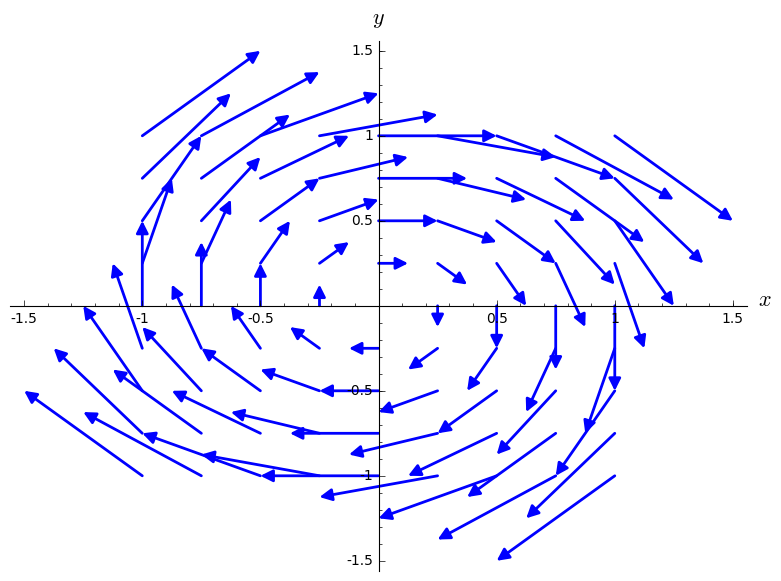

In [162]:
graph_z0 = E[3].plot(chart=stereoN, ambient_coords=(x,y),
                     fixed_coords={z: 0}, max_range=1, scale=0.5)
graph_z0

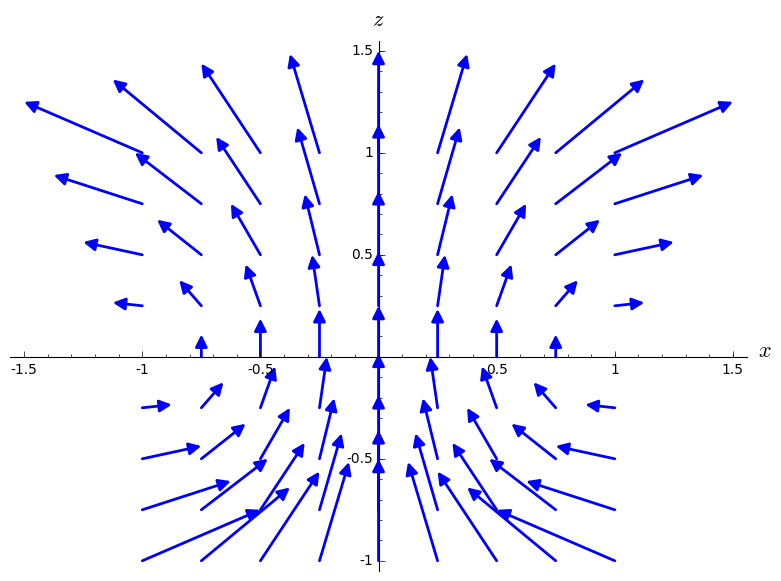

In [165]:
graph_y0 = E[3].plot(chart=stereoN, ambient_coords=(x,z),
                     fixed_coords={y: 0}, max_range=1, scale=0.5)
graph_y0